# Лабораторная работа №3

## Реализация сверточной нейронной сети

В работе предлагается использовать набор данных _notMNIST_, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (_A_ ... _J_, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.

Данные можно скачать по ссылке:

* https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz (большой набор данных);

* https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz (маленький набор данных);

Описание данных на английском языке доступно по ссылке:
http://yaroslavvb.blogspot.sg/2011/09/notmnist-dataset.html

### Задание 1

Реализуйте нейронную сеть с двумя сверточными слоями, и одним полносвязным с нейронами с кусочно-линейной функцией активации. Какова точность построенной модели?

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
BASE_DIR = '/content/drive/My Drive/Colab Files/mo-2'

import sys

sys.path.append(BASE_DIR)

import os

os.chdir(BASE_DIR)

In [0]:
import pandas as pd

dataframe = pd.read_pickle("./large.pkl")

In [4]:
! pip install tensorflow-gpu --pre --quiet

! pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.2.0rc3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, grpcio, termcolor, h5py, wheel, wrapt, scipy, gast, tensorflow-estimator, numpy, tensorboard, absl-py, astunparse, keras-preprocessing, protobuf, google-pasta, opt-einsum
Required-by: 


In [0]:
import tensorflow as tf

In [0]:
# To fix memory leak: https://github.com/tensorflow/tensorflow/issues/33009

tf.compat.v1.disable_eager_execution()

In [0]:
import numpy as np

In [8]:
x = np.asarray(list(dataframe['data']))[..., np.newaxis]

x = tf.keras.utils.normalize(x, axis = 1)

x.shape

(461946, 28, 28, 1)

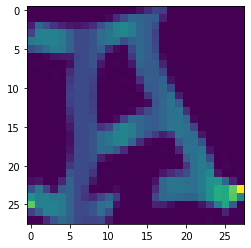

In [27]:
import matplotlib.pyplot as plt

plt.imshow(x[100].squeeze())

In [0]:
IMAGE_DIM_0, IMAGE_DIM_1 = x.shape[1], x.shape[2]

In [10]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(dataframe['label'].astype('category').cat.codes.astype('int32'))

y.shape

(461946, 10)

In [0]:
CLASSES_N = y.shape[1]

In [0]:
DENSE_LAYER_WIDTH = 5000

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape = (IMAGE_DIM_0, IMAGE_DIM_1, 1)))
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(Flatten())
model.add(Dense(DENSE_LAYER_WIDTH, activation = 'relu'))
model.add(Dense(CLASSES_N))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
def cat_cross_from_logits(y_true, y_pred):
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits = True)

model.compile(optimizer = 'sgd',
              loss = cat_cross_from_logits,
              metrics = ['categorical_accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 5000)              125445000 
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50010     
Total params: 125,499,810
Trainable params: 125,499,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
VAL_SPLIT_RATE = 0.1

In [0]:
EPOCHS_N = 10

In [18]:
model.fit(x = x, y = y, epochs = EPOCHS_N, validation_split = VAL_SPLIT_RATE)

Train on 415751 samples, validate on 46195 samples
Epoch 1/10
415751/415751 [==============================] - 126s 304us/sample - loss: 0.4728 - categorical_accuracy: 0.8599 - val_loss: 2.9611 - val_categorical_accuracy: 0.1937
Epoch 2/10
415751/415751 [==============================] - 127s 305us/sample - loss: 0.3451 - categorical_accuracy: 0.8957 - val_loss: 2.1803 - val_categorical_accuracy: 0.4669
Epoch 3/10
415751/415751 [==============================] - 126s 302us/sample - loss: 0.2919 - categorical_accuracy: 0.9112 - val_loss: 1.8064 - val_categorical_accuracy: 0.6041
Epoch 4/10
415751/415751 [==============================] - 126s 303us/sample - loss: 0.2506 - categorical_accuracy: 0.9234 - val_loss: 2.0507 - val_categorical_accuracy: 0.5340
Epoch 5/10
415751/415751 [==============================] - 126s 303us/sample - loss: 0.2140 - categorical_accuracy: 0.9344 - val_loss: 1.9813 - val_categorical_accuracy: 0.5627
Epoch 6/10
415751/415751 [==============================] -

Лучшая точность построенной модели на валидационной выборке составила 60%.

### Задание 2

Замените один из сверточных слоев на слой, реализующий операцию пулинга (_Pooling_) с функцией максимума или среднего. Как это повлияло на точность классификатора?

In [0]:
from tensorflow.keras.layers import MaxPooling2D

model_2 = tf.keras.Sequential()

model_2.add(Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape = (IMAGE_DIM_0, IMAGE_DIM_1, 1)))
model_2.add(MaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(DENSE_LAYER_WIDTH, activation = 'relu'))
model_2.add(Dense(CLASSES_N))

In [0]:
model_2.compile(optimizer = 'sgd',
               loss = cat_cross_from_logits,
               metrics = ['categorical_accuracy'])

In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5000)              15685000  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
Total params: 15,735,170
Trainable params: 15,735,170
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_2.fit(x = x, y = y, epochs = EPOCHS_N, validation_split = VAL_SPLIT_RATE)

Train on 415751 samples, validate on 46195 samples
Epoch 1/10
415751/415751 [==============================] - 40s 97us/sample - loss: 0.5639 - categorical_accuracy: 0.8391 - val_loss: 3.4563 - val_categorical_accuracy: 0.0550
Epoch 2/10
415751/415751 [==============================] - 40s 96us/sample - loss: 0.3971 - categorical_accuracy: 0.8806 - val_loss: 2.9262 - val_categorical_accuracy: 0.2779
Epoch 3/10
415751/415751 [==============================] - 40s 96us/sample - loss: 0.3516 - categorical_accuracy: 0.8940 - val_loss: 2.3184 - val_categorical_accuracy: 0.4270
Epoch 4/10
415751/415751 [==============================] - 40s 96us/sample - loss: 0.3224 - categorical_accuracy: 0.9025 - val_loss: 1.9385 - val_categorical_accuracy: 0.5441
Epoch 5/10
415751/415751 [==============================] - 40s 96us/sample - loss: 0.2997 - categorical_accuracy: 0.9091 - val_loss: 2.3843 - val_categorical_accuracy: 0.4684
Epoch 6/10
415751/415751 [==============================] - 41s 98us/

Замена свёрточного слоя на операцию пулинга снизила лучшую точность на валидационной выборке до 56%.

### Задание 3

Реализуйте классическую архитектуру сверточных сетей _LeNet-5_ (http://yann.lecun.com/exdb/lenet/).

In [0]:
from tensorflow.keras.layers import AveragePooling2D

model_3 = tf.keras.Sequential()

model_3.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'same',
                   input_shape = (IMAGE_DIM_0, IMAGE_DIM_1, 1)))
model_3.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model_3.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'valid'))
model_3.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model_3.add(Flatten())
model_3.add(Dense(120, activation = 'tanh'))
model_3.add(Dense(84, activation = 'tanh'))
model_3.add(Dense(CLASSES_N, activation = 'softmax'))

In [0]:
model_3.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['categorical_accuracy'])

In [25]:
model_3.fit(x = x, y = y, epochs = EPOCHS_N, validation_split = VAL_SPLIT_RATE)

Train on 415751 samples, validate on 46195 samples
Epoch 1/10
415751/415751 [==============================] - 33s 80us/sample - loss: 0.4420 - categorical_accuracy: 0.8650 - val_loss: 2.7961 - val_categorical_accuracy: 0.2953
Epoch 2/10
415751/415751 [==============================] - 33s 80us/sample - loss: 0.3455 - categorical_accuracy: 0.8929 - val_loss: 2.6437 - val_categorical_accuracy: 0.3695
Epoch 3/10
415751/415751 [==============================] - 33s 80us/sample - loss: 0.3196 - categorical_accuracy: 0.8999 - val_loss: 2.1973 - val_categorical_accuracy: 0.4337
Epoch 4/10
415751/415751 [==============================] - 34s 81us/sample - loss: 0.3030 - categorical_accuracy: 0.9048 - val_loss: 2.7226 - val_categorical_accuracy: 0.3638
Epoch 5/10
415751/415751 [==============================] - 33s 79us/sample - loss: 0.2943 - categorical_accuracy: 0.9075 - val_loss: 1.8196 - val_categorical_accuracy: 0.5834
Epoch 6/10
415751/415751 [==============================] - 33s 79us/

Удивительно, но _LeNet-5_ показала результат хуже, чем первая модель, несмотря на то, что включала её слои и даже больше &mdash; всего 58% на валидационной выборке.

### Задание 4

Сравните максимальные точности моделей, построенных в лабораторных работах 1-3. Как можно объяснить полученные различия?

Результаты на валидационной выборке:

* логистическая регрессия &mdash; 81%;

* все модели с только полносвязными слоями &mdash; 0%;

* модель с двумя свёрточными слоями и одним полносвязным &mdash; 60%;

* модель с одним свёрточным слоем, операцией пулинга и одним полносвязным &mdash; 56%;

* _LeNet-5_ &mdash; два свёрточных слоя две операции пулинга два полносвязных слоя &mdash; 58%.

Получается, что логистическая регрессия дала наилучший результат.

Объяснить это можно недостатками самостоятельной реализации сетей.